In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# K-Means Clustering

In [10]:
from sklearn.cluster import KMeans

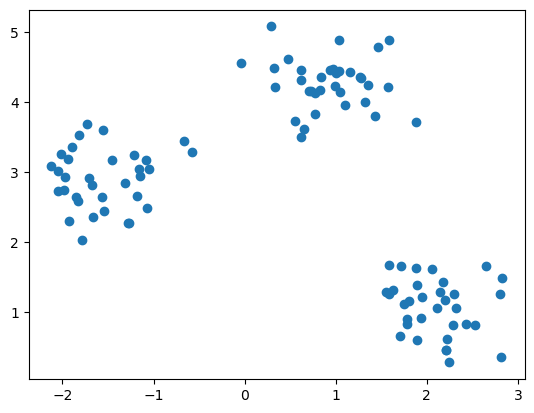

In [21]:
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

C:\Users\mtx\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mtx\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


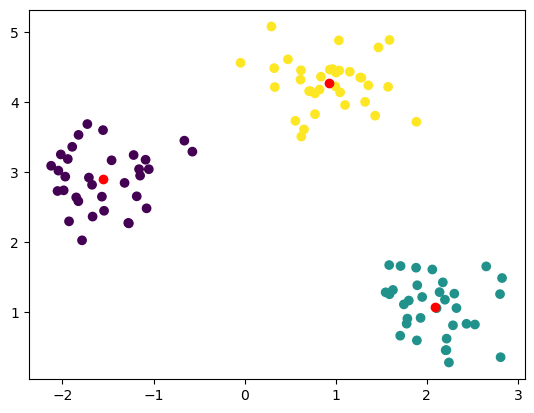

In [27]:
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1],c=model.predict(X))
model.cluster_centers_
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='r')

In [33]:
model.inertia_

30.870531280140675

In [34]:
inertia = []
K_range = range(1,20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

C:\Users\mtx\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mtx\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mtx\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mtx\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

C:\Users\mtx\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mtx\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mtx\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mtx\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Text(0, 0.5, 'Cout du modele (Inertia)')

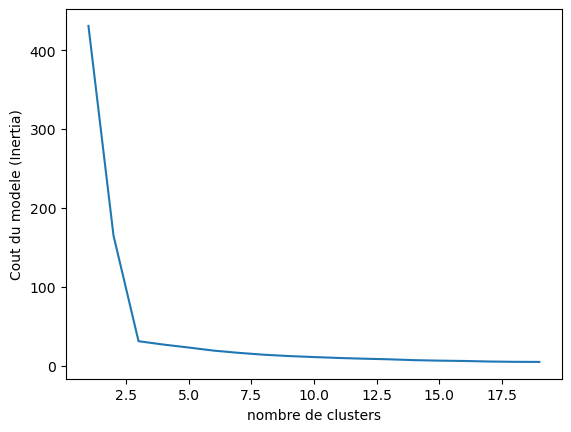

In [35]:
plt.plot(K_range,inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

# Detection d'anomalies avec Isolation Forest

In [36]:
from sklearn.ensemble import IsolationForest

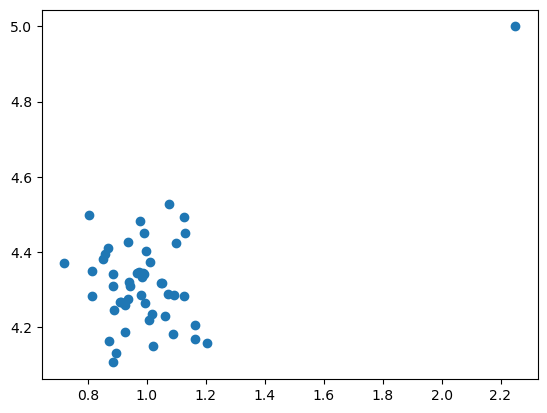

In [38]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])
plt.scatter(X[:,0], X[:, 1])

In [40]:
model = IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(contamination=0.01)

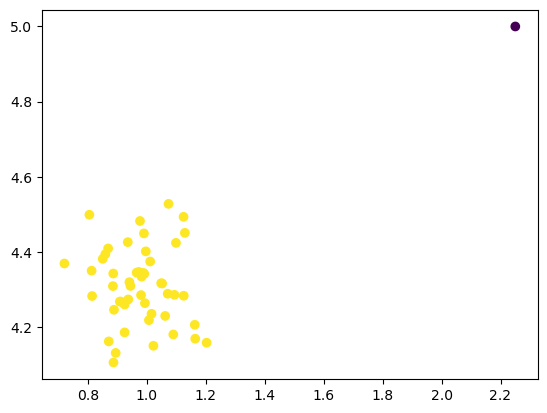

In [41]:
plt.scatter(X[:,0], X[:, 1],c=model.predict(X))

# Application : Digits Outliers

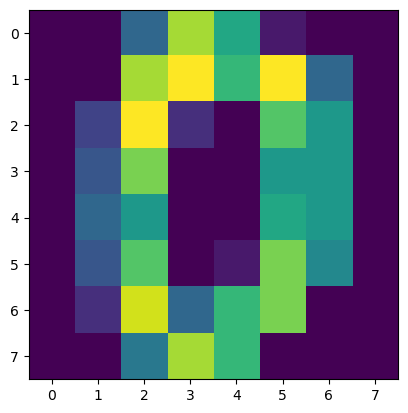

In [90]:
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

plt.imshow(images[0])

In [58]:
model = IsolationForest(random_state=0,contamination=0.02)
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [59]:
outliers = model.predict(X) ==-1

In [60]:
outliers

array([False, False, False, ..., False, False, False])

Text(0.5, 1.0, '5')

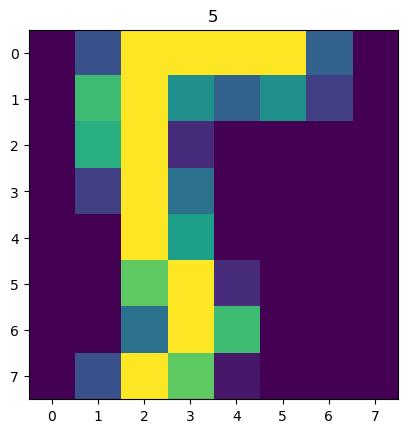

In [66]:
plt.imshow(images[outliers][2])
plt.title(y[outliers][2])

In [67]:
images[outliers][0]

array([[ 0.,  0.,  0.,  0., 11., 15.,  4.,  0.],
       [ 0.,  0.,  0.,  3., 16., 16., 12.,  0.],
       [ 0.,  0.,  0.,  8., 14., 16., 12.,  0.],
       [ 0.,  0.,  0.,  5., 10., 16.,  6.,  0.],
       [ 0.,  1.,  7., 11., 16., 13.,  0.,  0.],
       [ 0.,  9., 16., 16., 14.,  1.,  0.,  0.],
       [ 0.,  3.,  8., 14., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 11., 16., 12.,  0.]])

# PCA : Reduction de dimension

In [68]:
# Visualisation 2D

In [99]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
X_reduced = model.fit_transform(X)

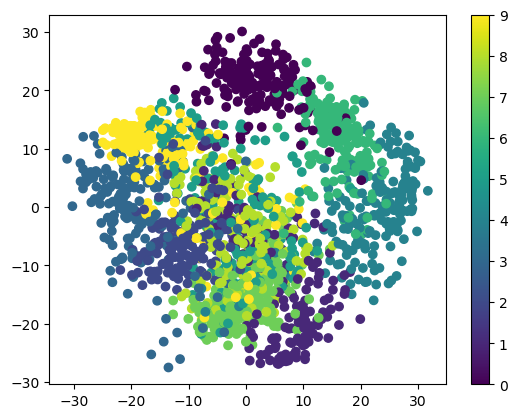

In [100]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y)
plt.colorbar()

In [101]:
model.components_

array([[ 2.22044605e-16, -1.73094653e-02, -2.23428835e-01,
        -1.35913298e-01, -3.30322986e-02, -9.66340850e-02,
        -8.32944356e-03,  2.26899983e-03, -3.20516472e-04,
        -1.19308904e-01, -2.44451678e-01,  1.48512745e-01,
        -4.67319410e-02, -2.17740742e-01, -1.48136829e-02,
         4.47779459e-03, -4.94136335e-05, -7.95419380e-02,
         8.33951386e-02,  2.15915342e-01, -1.72126805e-01,
        -1.63712096e-01,  2.86444436e-02,  4.23251797e-03,
         9.85488598e-05,  6.42319151e-02,  2.54093316e-01,
        -3.56770980e-02, -2.09462572e-01, -4.31311405e-02,
         5.13118714e-02,  2.13422734e-04, -0.00000000e+00,
         1.59950884e-01,  3.68690778e-01,  1.64406828e-01,
         8.52007880e-02,  3.72982834e-02,  2.15867007e-02,
        -0.00000000e+00,  1.28865585e-03,  1.06945285e-01,
         3.03067453e-01,  2.47813037e-01,  2.09637299e-01,
         1.22325174e-02, -3.69458469e-02,  1.61485047e-03,
         6.93023551e-04, -8.35144361e-03, -5.58599027e-0

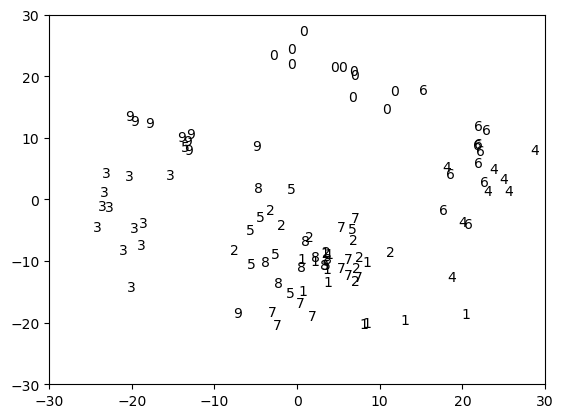

In [102]:
plt.figure()
plt.xlim(-30, 30)
plt.ylim(-30, 30)

for i in range(100): # max 1797
    plt.text(X_reduced[i,0], X_reduced[i,1], str(y[i]))

# Compression de données

In [146]:
model = PCA(n_components=64)
X_reduced = model.fit_transform(X)

In [147]:
model.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [166]:
np.argmax(np.cumsum(model.explained_variance_ratio_)>0.9)

20

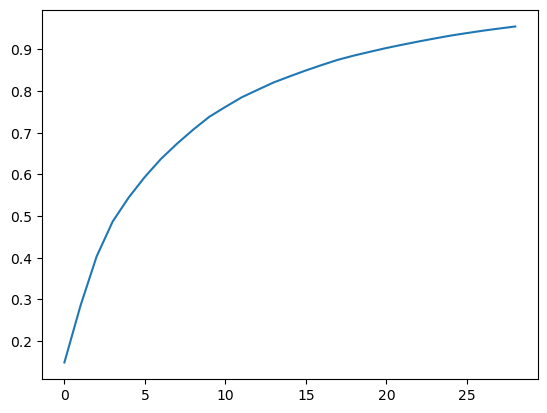

In [167]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [168]:
model = PCA(n_components=0.95)
X_reduced = model.fit_transform(X)

In [169]:
X_recovered = model.inverse_transform(X_reduced)

Text(0.5, 1.0, '0')

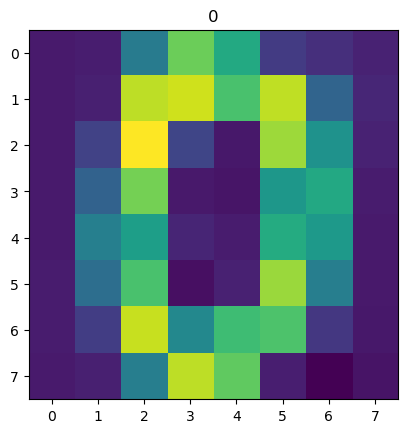

In [170]:
plt.imshow(X_recovered[0].reshape(8,8))
plt.title(y[0])

In [164]:
model.n_components_

29